# Guiding questions

In which fields does the international student population overtake the domestic student population?

How important a role do international students play in our graduate programs?

Are students making compromises in academic choices in order to receive better chances of getting work visa?

In [1]:
from collections import defaultdict
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from utils import read_gss
d, ufields = read_gss('../data/GSS_Columbia_Detailed.csv')

In [3]:
DOM_COL_NAME = 'U.S. citizens and permanent residents (non-U.S. citizens holding green cards)'
INT_COL_NAME = 'Foreign nationals'

DOM_LABEL = 'U.S. citizens & permanent residents'
INT_LABEL = INT_COL_NAME

In [4]:
years = np.arange(1994, 2017)

def plotField(ax, field):
    domestic = []
    international = []
    
    for year in years:
        counts = d[year][field]
        domestic.append(counts.get(DOM_COL_NAME, None))
        international.append(counts.get(INT_COL_NAME, None))

    ax.plot(years, domestic, label=DOM_LABEL)
    ax.plot(years, international, label=INT_LABEL)
    
    ax.set_title(field)
    ax.set(xlabel='Year', ylabel='Number of graduate students')

IndexError: index 16 is out of bounds for axis 0 with size 16

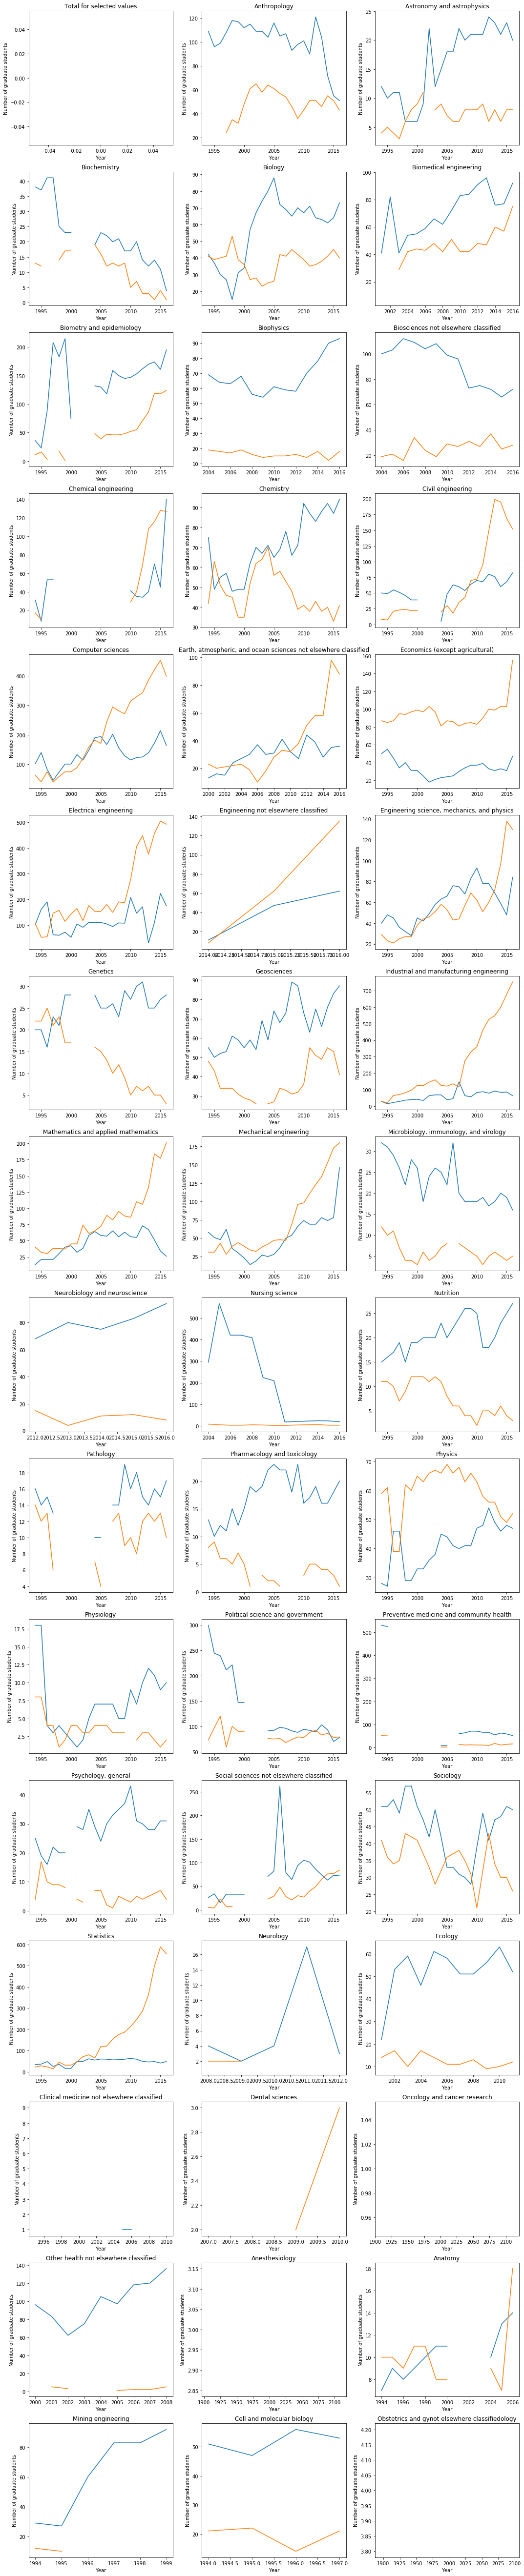

In [5]:
cols = 3
rows = int(len(ufields) / cols)

_, axarr = plt.subplots(rows, cols, figsize=(6 * cols, 6 * rows))

for i in range(len(ufields)):
    plotField(axarr[ i // cols, i % cols ], ufields[i])
    
axarr[0, 0].legend()

Let's isolate those STEM fields that see the greatest international student increases.

In [ ]:
ufields

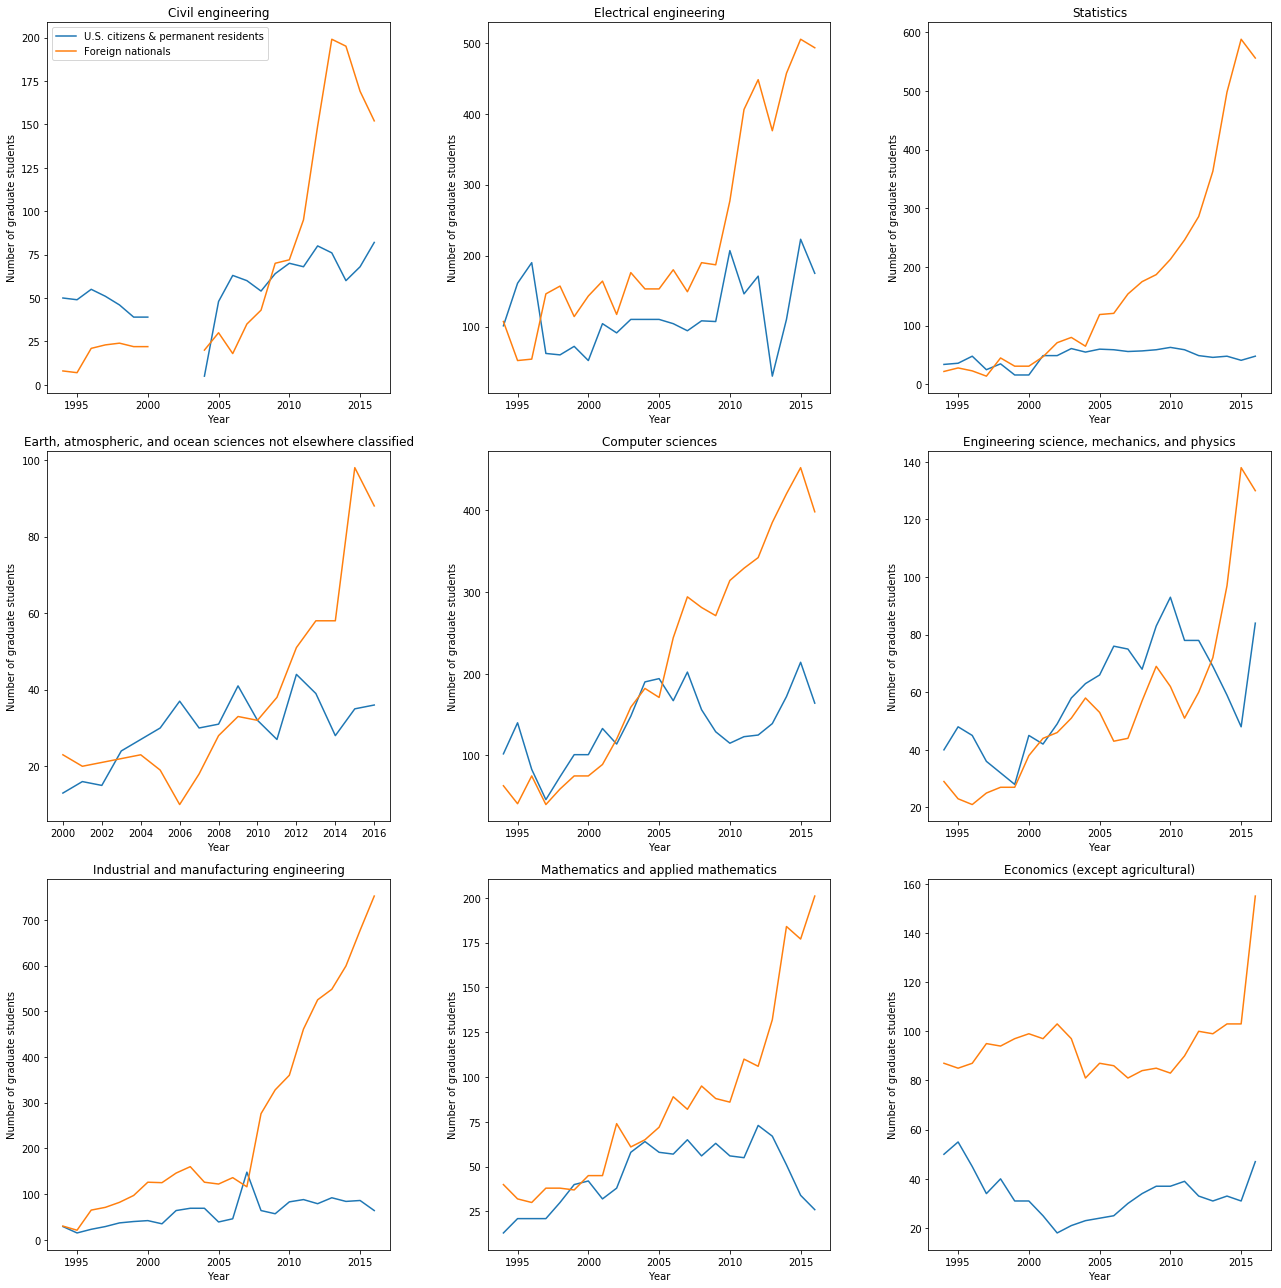

In [53]:
fieldsOfInterest = [
    'Civil engineering',
    'Electrical engineering',
    'Statistics',
    'Earth, atmospheric, and ocean sciences not elsewhere classified',
    'Computer sciences',
    'Engineering science, mechanics, and physics',
    'Industrial and manufacturing engineering',
    'Mathematics and applied mathematics',
    'Economics (except agricultural)',
]

fig, axarr = plt.subplots(3, 3, figsize=(18, 18))

for i in range(len(fieldsOfInterest)):
    plotField(axarr[i // 3, i % 3], fieldsOfInterest[i])
axarr[0, 0].legend()

fig.tight_layout()
fig.savefig('selected_detailed_fields.png')

What do international students study at Columbia?

In [64]:
intrCounts = {}

for f in ufields:
    ary = [d[year][f].get(INT_COL_NAME, 0) for year in years]
    intrCounts[f] = ary

In [68]:
yearTotals = [sum(a) for a in zip(*intrCounts.values())]
yearTotals

[947.0,
 911.0,
 869.0,
 860.0,
 1043.0,
 957.0,
 1060.0,
 997.0,
 1051.0,
 1154.0,
 1443.0,
 1474.0,
 1594.0,
 1641.0,
 1889.0,
 1986.0,
 2180.0,
 2590.0,
 2923.0,
 3137.0,
 3631.0,
 3976.0,
 4082.0]

In [69]:
def sumWithNone(item):
    s = 0
    for x in item[1]:
        if x is not None:            
            s += x
    return s

topFields = sorted(intrCounts.items(), key=sumWithNone, reverse=True)

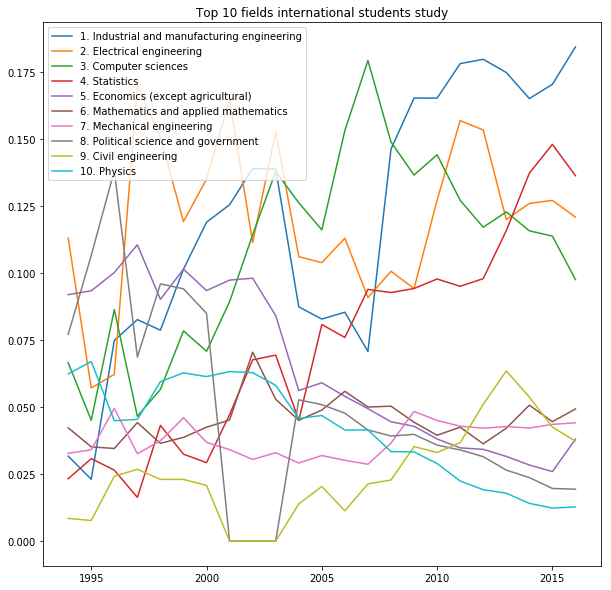

In [70]:
def getProportions(a):
    return [a[i] / yearTotals[i] for i in range(len(a))]

plt.figure(figsize=(10, 10))
for i, f in enumerate(topFields[:10]):
    plt.plot(years, getProportions(f[1]), label=f'{i + 1}. {f[0]}')
plt.title('Top 10 fields international students study')
plt.legend()

## Findings